In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

## Data collection and analysis

In [32]:
# loading the dataset from csv file to a Pandas Dataframe
big_mart_dataset = pd.read_csv("dataset/big_mart.csv")

In [33]:
# number of data points and number of features
big_mart_dataset.shape

(8523, 12)

In [34]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
# Getiting information about the dataset
big_mart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical features
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [36]:
# checking for missing value
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling missing values

Mean --> Average value  
Mode --> Most repeated value

In [37]:
# mean value of "Item_Weight" column
item_weight_mean = big_mart_dataset.Item_Weight.mean()
item_weight_mean

12.857645184135976

In [38]:
# Filling the missing value in "Item_Weight" column with mean value
big_mart_dataset.Item_Weight.fillna(big_mart_dataset.Item_Weight.mean(), inplace=True)

In [39]:
# checking for missing value
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Replacing the missing values in Outlet_Size with mode

In [40]:
mode_of_outlet_size = big_mart_dataset.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=lambda x: x.mode()[0])

In [41]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [42]:
missing_values = big_mart_dataset.Outlet_Size.isnull()

In [43]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [54]:
big_mart_dataset.loc[missing_values, "Outlet_Size"] = big_mart_dataset.loc[missing_values, "Outlet_Type"].apply(lambda x: mode_of_outlet_size[x].values[0])

In [55]:
big_mart_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [56]:
# Get statistical measures
big_mart_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [57]:
sns.set()

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Weight', ylabel='Count'>

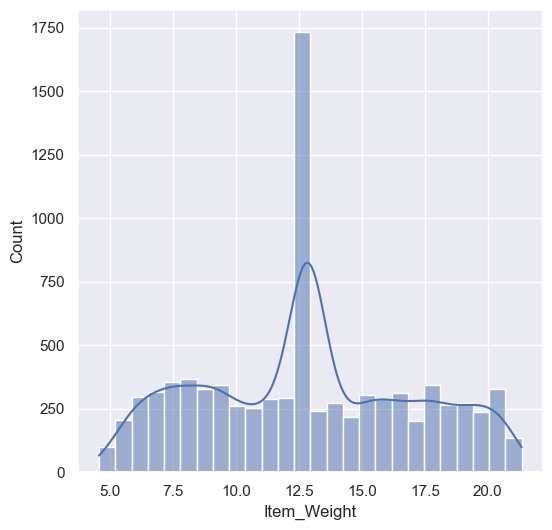

In [59]:
# Item_Weight distribution
plt.figure(figsize=(6, 6))
sns.histplot(big_mart_dataset.Item_Weight, kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Visibility', ylabel='Count'>

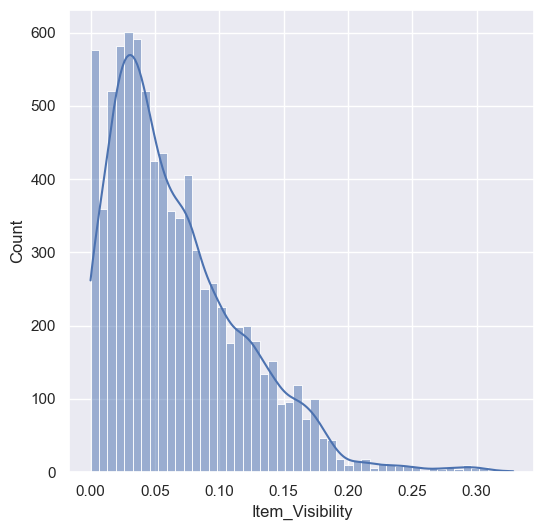

In [61]:
# Item_Visibility distribution
plt.figure(figsize=(6, 6))
sns.histplot(big_mart_dataset.Item_Visibility, kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_MRP', ylabel='Count'>

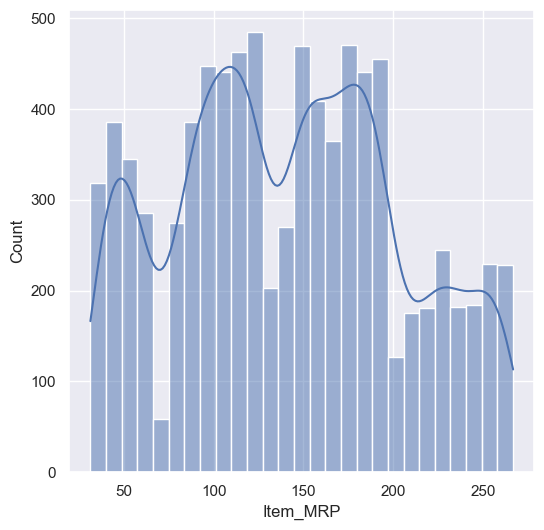

In [62]:
# Item_Visibility distribution
plt.figure(figsize=(6, 6))
sns.histplot(big_mart_dataset.Item_MRP, kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

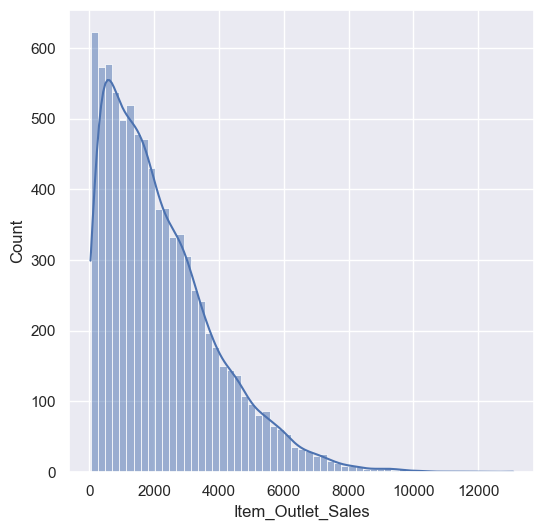

In [63]:
# Item_Visibility distribution
plt.figure(figsize=(6, 6))
sns.histplot(big_mart_dataset.Item_Outlet_Sales, kde=True)

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


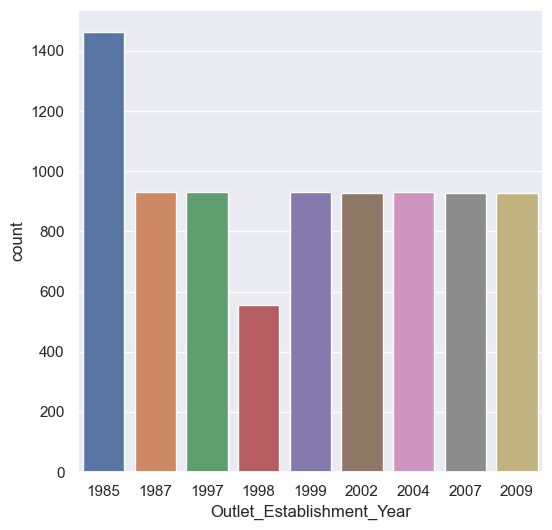

In [64]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year", data=big_mart_dataset)
plt.show()

## Categorical features

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


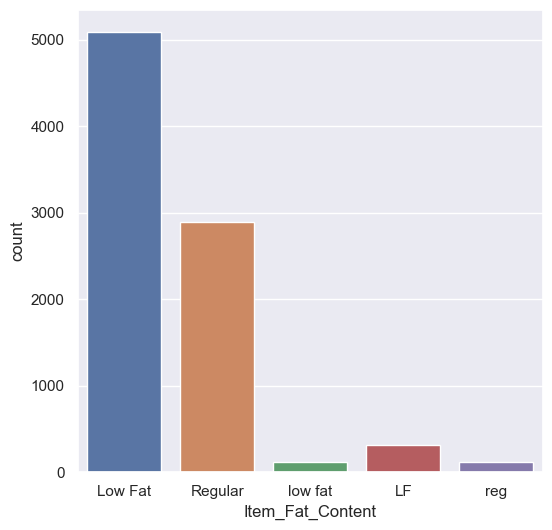

In [66]:
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data=big_mart_dataset)
plt.show()

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


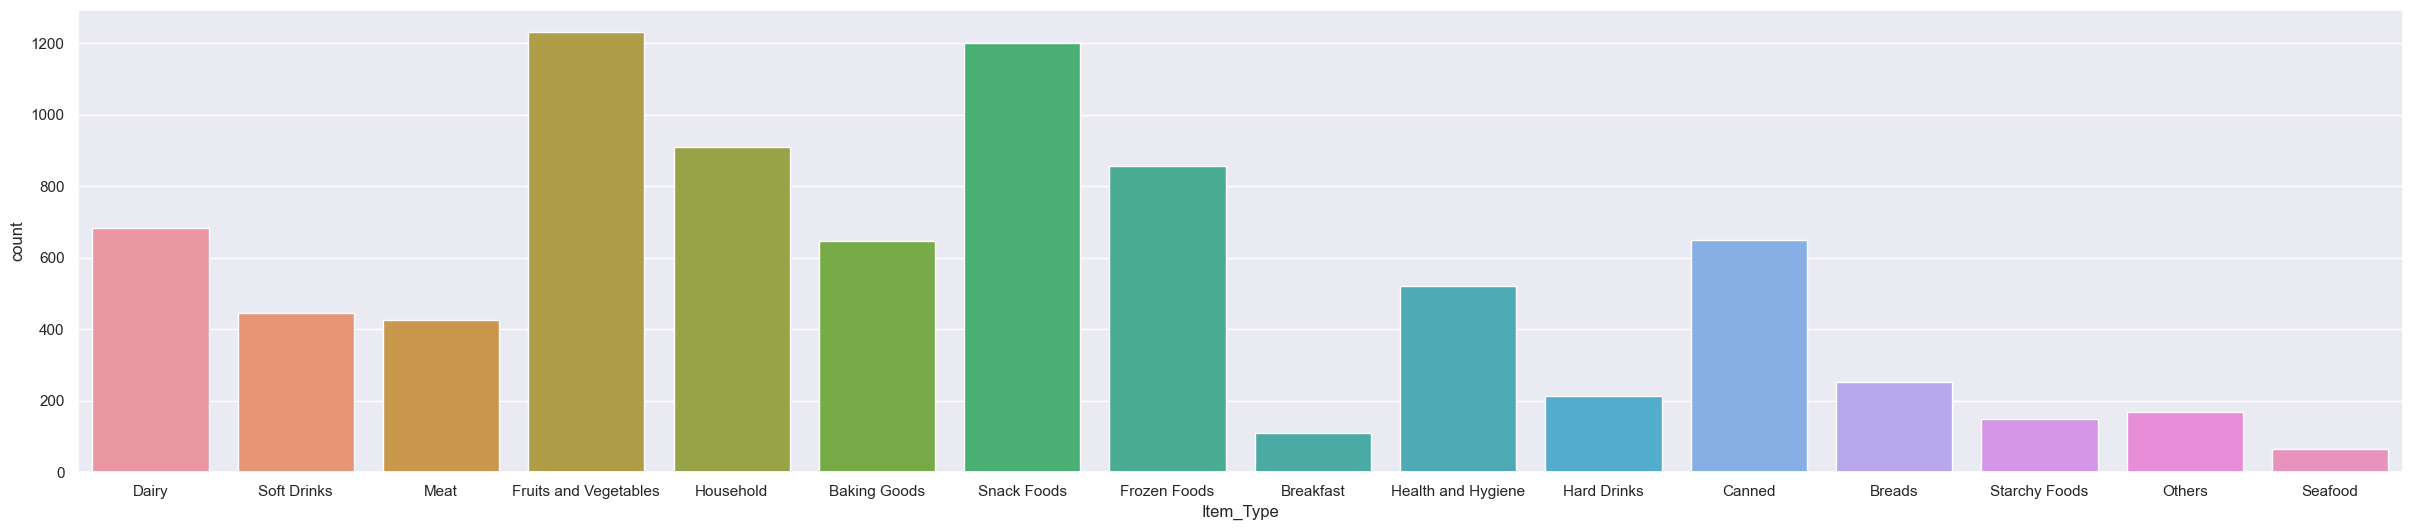

In [69]:
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type", data=big_mart_dataset)
plt.show()

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


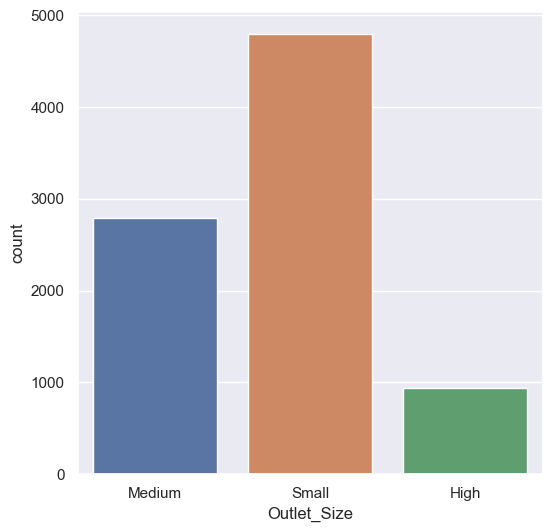

In [71]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size", data=big_mart_dataset)
plt.show()

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


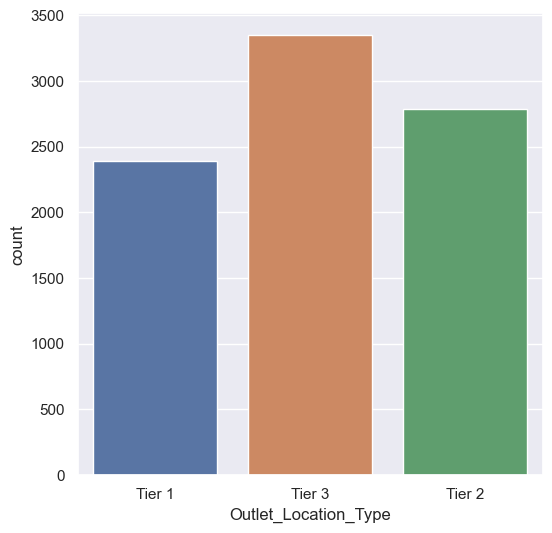

In [72]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type", data=big_mart_dataset)
plt.show()

/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


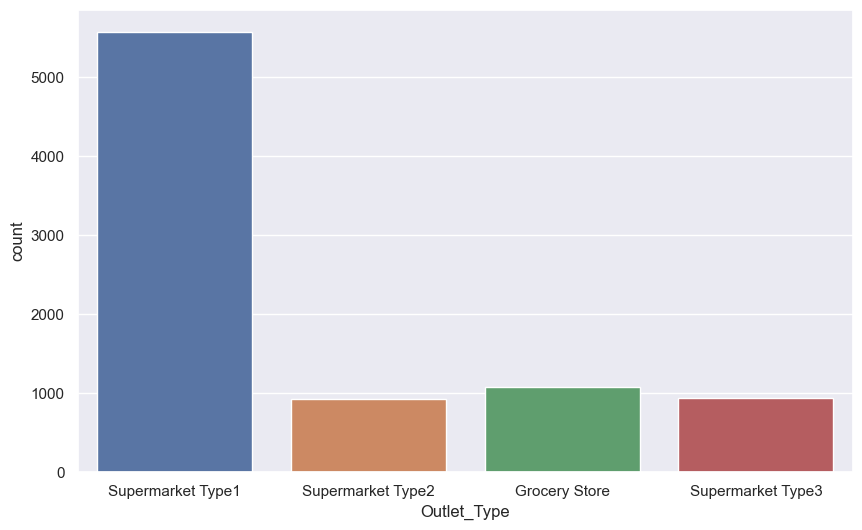

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Type", data=big_mart_dataset)
plt.show()

## Data Preprocessing

In [75]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
big_mart_dataset.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [79]:
big_mart_dataset.replace({"Item_Fat_Content": {"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}}, inplace=True)

In [80]:
big_mart_dataset.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Label Encoding

In [81]:
encoder = LabelEncoder()

In [88]:
big_mart_dataset.Item_Identifier = encoder.fit_transform(big_mart_dataset.Item_Identifier)

In [90]:
big_mart_dataset.Item_Fat_Content = encoder.fit_transform(big_mart_dataset.Item_Fat_Content)
big_mart_dataset.Item_Type = encoder.fit_transform(big_mart_dataset.Item_Type)
big_mart_dataset.Outlet_Identifier = encoder.fit_transform(big_mart_dataset.Outlet_Identifier)
big_mart_dataset.Outlet_Size = encoder.fit_transform(big_mart_dataset.Outlet_Size)
big_mart_dataset.Outlet_Location_Type = encoder.fit_transform(big_mart_dataset.Outlet_Location_Type)
big_mart_dataset.Outlet_Type = encoder.fit_transform(big_mart_dataset.Outlet_Type)

In [91]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Splitting features and targets

In [93]:
X = big_mart_dataset.drop("Item_Outlet_Sales", axis=1)
y = big_mart_dataset["Item_Outlet_Sales"]

## Train Test splitting

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [98]:
X.shape, X_train.shape, X_test.shape

((8523, 11), (6818, 11), (1705, 11))

## Train model

In [110]:
# regressor = XGBRegressor()
regressor = RandomForestRegressor()

In [111]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Model evaluation

In [112]:
y_train_prediction = regressor.predict(X_train)

In [113]:
mse_score = metrics.r2_score(y_train, y_train_prediction)
print(f"MSE: {mse_score}")

MSE: 0.9370878492027295


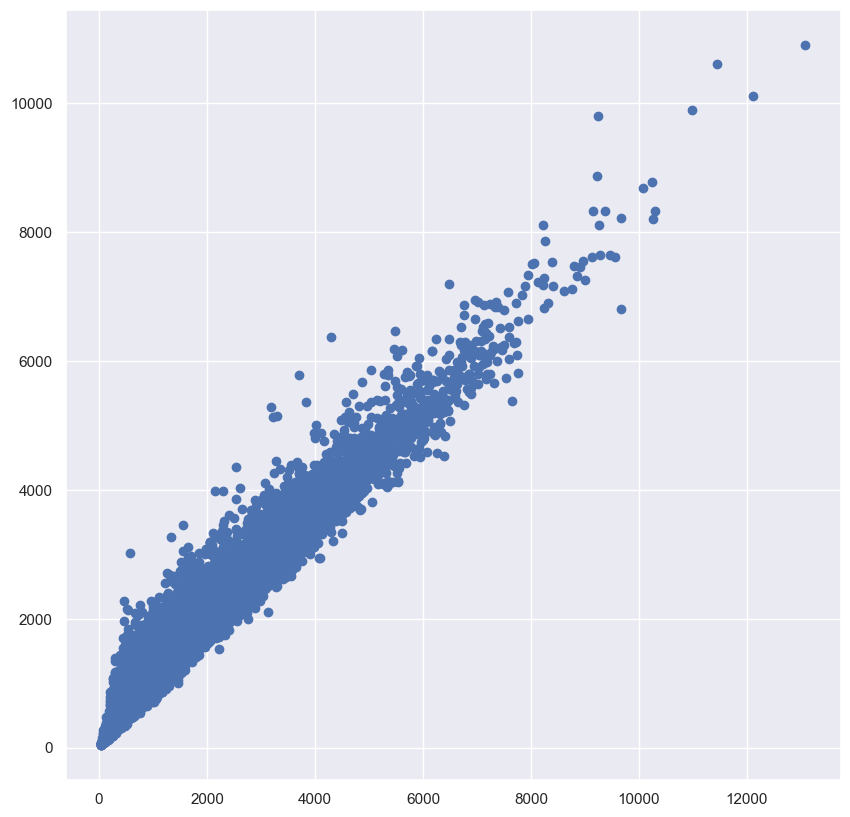

In [114]:
plt.figure(figsize=(10, 10))

plt.scatter(y_train, y_train_prediction)
plt.show()

In [115]:
## Testing set
y_test_prediction = regressor.predict(X_test)

In [116]:
mse_score = metrics.r2_score(y_test, y_test_prediction)
print(f"MSE: {mse_score}")

MSE: 0.5530820314590709


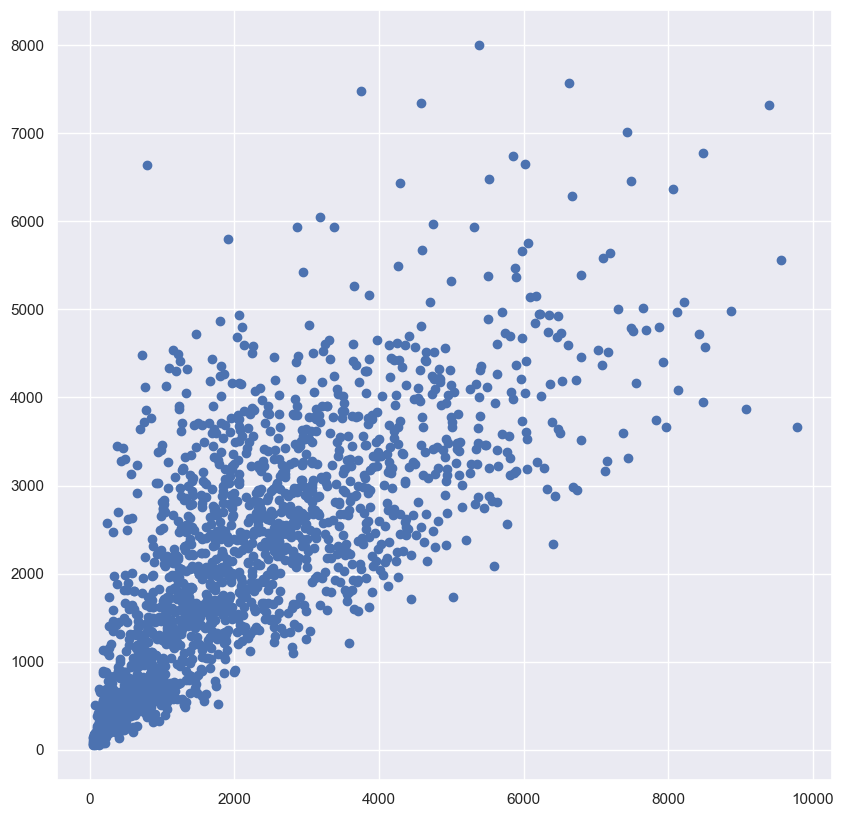

In [117]:
plt.figure(figsize=(10, 10))

plt.scatter(y_test, y_test_prediction)
plt.show()